In [2]:
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys
import braingeneers.utils.smart_open_braingeneers as smart_open
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from braingeneers.analysis import plot
from braingeneers.analysis import single_unit

In [23]:
folder_dir = "/home/kang/disk/Opto/20230402_ucsf/"

#### Control: before bicuculline (0404)

In [4]:
# baseline_path = folder_dir + "hc3.28_hckcr1_chip8787_plated4.4_rec4.4.raw.h5"
# baseline_curation_path = folder_dir + "hc3.28_hckcr1_chip8787_plated4.4_rec4.4_phy/hc3.28_hckcr1_chip8787_plated4.4_rec4.4_curated.zip"

#### Control: With bicuculline, no stim (0403)

In [5]:
# bi_0403_path = folder_dir + "hc3.28_aav9-ChR2_chip18752_plated4.3_rec4.3.raw.h5"
# bi_0403_curation_path = folder_dir + "hc3.28_aav9-ChR2_chip18752_plated4.3_rec4.3_phy/hc3.28_aav9-ChR2_chip18752_plated4.3_rec4.3_curated.zip"

#### Bicuculine trials = 5

In [24]:
rec_hckcr_3_path = folder_dir + "2023_04_04_hc328_hckcr1-2_3.raw.h5"
rec_hckcr_3_curation_path = folder_dir + "2023_04_04_hc328_hckcr1-2_3_phy/2023_04_04_hc328_hckcr1-2_3_curated.zip"
file_name = "2023_04_04_hc328_hckcr1-2_3.raw.h5"

In [25]:
# rec_0510_path = "/home/kang/disk/Opto/20230510_ucsf/hc52_chip18790_rec51023_2.raw.h5"
# rec_0510_curation_path = "/home/kang/disk/Opto/20230510_ucsf/hc52_chip18790_rec51023_2_curated.zip"
# file_name = "hc52_chip18790_rec51023_2.raw.h5"
# spike_data_0510 = analysis.read_phy_files(rec_0510_curation_path)
# stim_pairs_0510 = ephys.load_gpio_maxwell(rec_0510_path)

In [26]:
# # add two more rows for 0509 recording 5 (1 stim) and 6 (first stim)
# rec_05095_path = "/home/kang/disk/Opto/20230509_ucsf/hc52_18763_rec05092023_5.raw.h5"
# rec_05095_curation_path = "/home/kang/disk/Opto/20230509_ucsf/hc52_18763_rec05092023_5_curated.zip"
# file_name = "hc52_18763_rec05092023_5"
# spike_data_05095 = analysis.read_phy_files(rec_05095_curation_path)
# stim_pairs_05095 = ephys.load_gpio_maxwell(rec_05095_path)

# rec_05096_path = "/home/kang/disk/Opto/20230509_ucsf/hc52_18763_rec05092023_6.raw.h5"
# rec_05096_curation_path = "/home/kang/disk/Opto/20230509_ucsf/hc52_18763_rec05092023_6_curated.zip"
# file_name = "hc52_18763_rec05092023_6"
# spike_data_05096 = analysis.read_phy_files(rec_05096_curation_path)
# stim_pairs_05096 = ephys.load_gpio_maxwell(rec_05096_path)

In [27]:
# spike_data_baseline = analysis.read_phy_files(baseline_curation_path)
# spike_data_bi0403 = analysis.read_phy_files(bi_0403_curation_path)

In [29]:
spike_data_hckcr_3 = analysis.read_phy_files(rec_hckcr_3_curation_path)
stim_pairs_bi = ephys.load_gpio_maxwell(rec_hckcr_3_path)
print(stim_pairs_bi)

Odd number of GPIO events can't be paired. Here returns all the events.
[ 20.0151   30.01505  40.02905  50.029    60.0411   70.04105  80.0535
  90.05345 100.06565 110.0656  120.07845 130.0784  140.09185 150.0918
 160.0998  170.0998  180.1195  190.11945 200.13275 210.13275 220.14385
 230.1438  240.15345 250.1534  260.16815 270.1681  280.18385 290.18385
 300.19505]


In [30]:
## Take the first 5 stim pairs, no repeat section
num_trial = 5
offset = 2
stim_trial = stim_pairs_bi[offset:num_trial*4+offset].reshape(num_trial, 4)[:, :2]
print(stim_trial)

[[ 40.02905  50.029  ]
 [ 80.0535   90.05345]
 [120.07845 130.0784 ]
 [160.0998  170.0998 ]
 [200.13275 210.13275]]


In [31]:
# ## Take the first and the very last stim pairs, no repeat section
# stim_trial_0510 =  [stim_pairs_0510[0], stim_pairs_0510[-1]]
# print(stim_trial_0510)

In [32]:
# stim_trial_0509 = [stim_pairs_05095[0], stim_pairs_05096[0]]
# print(stim_trial_0509)

In [33]:
# num_trial = 7

In [34]:
bin_size = 1000
spike_data_sub = []
all_rates = []
all_stim = []
spike_data_all = []
# for i in [0, 2, 4]:
for i in range(num_trial):
    print(spike_data_hckcr_3.N)
    stim_pairs = stim_trial[i]
    print(stim_pairs.shape, stim_pairs, np.diff(stim_pairs))
    start = int(stim_pairs[0] - 10) * 1000.0
    end = int(stim_pairs[0] + 10 + 10) * 1000.0
    sub =  spike_data_hckcr_3.subtime(start, end)
    spike_data_sub.append(sub)
    spike_times = np.sort(np.hstack(sub.train))
    bins = np.arange(0, end-start+bin_size, bin_size)
    rate = (np.histogram(spike_times, bins)[0] / bin_size * 1000) / sub.N  # hz
    print("number of bins", len(bins))
    all_rates.append(rate)
    all_stim.append(stim_pairs)
    spike_data_all.append(spike_data_hckcr_3)

# # do the same to 0510 recording 
# for i in range(2):
#     print(spike_data_0510.N)
#     stim_pairs = stim_trial_0510[i]
#     print(stim_pairs.shape, stim_pairs, np.diff(stim_pairs))
#     start = int(stim_pairs[0] - 10) * 1000.0
#     end = int(stim_pairs[0] + 10 + 10) * 1000.0
#     sub =  spike_data_0510.subtime(start, end)
#     spike_data_sub.append(sub)
#     spike_times = np.sort(np.hstack(sub.train))
#     bins = np.arange(0, end-start+bin_size, bin_size)
#     rate = (np.histogram(spike_times, bins)[0] / bin_size * 1000) / sub.N  # hz
#     print("number of bins", len(bins))
#     all_rates.append(rate)
#     all_stim.append(stim_pairs)
#     spike_data_all.append(spike_data_0510)

# # add 05095 and 05096
# spike_data_0905 = [spike_data_05095, spike_data_05096]
# for i in range(2):
#     print(spike_data_0905[i].N)
#     stim_pairs = stim_trial_0509[i]
#     print(stim_pairs.shape, stim_pairs, np.diff(stim_pairs))
#     start = int(stim_pairs[0] - 10) * 1000.0
#     end = int(stim_pairs[0] + 10 + 10) * 1000.0
#     sub =  spike_data_0510.subtime(start, end)
#     spike_data_sub.append(sub)
#     spike_times = np.sort(np.hstack(sub.train))
#     bins = np.arange(0, end-start+bin_size, bin_size)
#     rate = (np.histogram(spike_times, bins)[0] / bin_size * 1000) / sub.N  # hz
#     print("number of bins", len(bins))
#     all_rates.append(rate)
#     all_stim.append(stim_pairs)
#     spike_data_all.append(spike_data_0510)


65
(2,) [40.02905 50.029  ] [9.99995]
number of bins 31
65
(2,) [80.0535  90.05345] [9.99995]
number of bins 31
65
(2,) [120.07845 130.0784 ] [9.99995]
number of bins 31
65
(2,) [160.0998 170.0998] [10.]
number of bins 31
65
(2,) [200.13275 210.13275] [10.]
number of bins 31


In [35]:
all_stim

[array([40.02905, 50.029  ]),
 array([80.0535 , 90.05345]),
 array([120.07845, 130.0784 ]),
 array([160.0998, 170.0998]),
 array([200.13275, 210.13275])]

In [36]:
drop = []
increase = []
back_normal = []
for i in range(num_trial):
    spike_data = spike_data_all[i]
    print(i, "Total num of units: ", spike_data.N)
    spike_times = np.sort(np.hstack(spike_data.train))
    length = (spike_times[-1] - spike_times[0])/1000
    stim_pairs = all_stim[i]
    print(stim_pairs.shape, stim_pairs, np.diff(stim_pairs))

    start = [stim_pairs[0]-10, stim_pairs[0], stim_pairs[0]+10]
    end = [stim_pairs[0], stim_pairs[0]+10, stim_pairs[0]+20]
    
    sub_1 =  spike_data.subtime(start[0]*1000.0, end[0]*1000.0)
    sub_2 = spike_data.subtime(start[1]*1000.0, end[1]*1000.0)
    counter_drop = 0
    no_drop = 0
    drop_id = []
    for n in range(spike_data.N):
        if len(sub_1.train[n]) > len(sub_2.train[n]):
            counter_drop += 1
            drop_id.append(n)
        else:
            no_drop += 1
    print("Percent of units having firing rate drop during stim: ", counter_drop/spike_data.N)
    # print("Percent of units no drop: ", no_drop/spike_data.N)
    drop.append(counter_drop/spike_data.N)
    # print(counter_drop, len(drop_id), drop_id)


    sub_3 = spike_data.subtime(start[2]*1000.0, end[2]*1000.0)
    counter_increase = 0
    extrem_increase = 0
    for n in drop_id:
        if len(sub_3.train[n]) > len(sub_2.train[n]):
            counter_increase += 1
        if len(sub_3.train[n]) >= len(sub_1.train[n]):
            extrem_increase += 1
    print("Percent of units having firing rate increase after stim: ", counter_increase/counter_drop)
    print("Percent of units having firing rate back to normal: ", extrem_increase/counter_drop)
    increase.append(counter_increase/counter_drop)
    back_normal.append(extrem_increase/counter_drop)

0 Total num of units:  65
(2,) [40.02905 50.029  ] [9.99995]
Percent of units having firing rate drop during stim:  0.7846153846153846
Percent of units having firing rate increase after stim:  0.9215686274509803
Percent of units having firing rate back to normal:  0.43137254901960786
1 Total num of units:  65
(2,) [80.0535  90.05345] [9.99995]
Percent of units having firing rate drop during stim:  0.9846153846153847
Percent of units having firing rate increase after stim:  0.78125
Percent of units having firing rate back to normal:  0.0625
2 Total num of units:  65
(2,) [120.07845 130.0784 ] [9.99995]
Percent of units having firing rate drop during stim:  0.7692307692307693
Percent of units having firing rate increase after stim:  0.94
Percent of units having firing rate back to normal:  0.8
3 Total num of units:  65
(2,) [160.0998 170.0998] [10.]
Percent of units having firing rate drop during stim:  0.8153846153846154
Percent of units having firing rate increase after stim:  0.981132

In [37]:
print(np.mean(drop))
print(np.mean(increase))
print(np.mean(back_normal))

0.8399999999999999
0.9175174133118084
0.6035429489119833


In [39]:
# import scipy
# mean_rate = [np.mean(all_rates[:3], axis=0), np.mean(all_rates[3:], axis=0)]
# # std_rate = np.std(all_rates, axis=0)
# # sem_rate = np.std(all_rates, ddof=1) / np.sqrt(np.size(all_rates))
# sem_rate = [scipy.stats.sem(all_rates[:3]), scipy.stats.sem(all_rates[3:])]
# xx_bin = np.arange(1, 31, 1)
# xx_stim = [10, 20]
# print(len(mean_rate), len(mean_rate[0]), len(mean_rate[1]))

# xx_bin = np.arange(1, 31, 1)
# xx_stim = [10, 20]

In [40]:
# from matplotlib.ticker import MaxNLocator
# import matplotlib.gridspec as gridspec
# fig, axs = plt.subplots(num_trial, 1, figsize = (9,8))
# axs1 = fig.add_subplot(111, facecolor="None")
# axs1.yaxis.set_label_position("right")

# for i in range(num_trial):
#     st_trial = spike_data_sub[i].train
#     for j in range(len(st_trial)):
#         yy = [j] * len(st_trial[j])
#         axs[i].scatter(np.asarray(st_trial[j])/1000, yy, s=0.5, color='k')

#     axs[i].get_xaxis().set_visible(False)
#     # axs[i].get_yaxis().set_visible(False)
#     plt.setp(axs[i].get_yticklabels(), visible=False)
#     axs[i].tick_params(axis='both', which='both', length=0)
#     if i < 3:
#         axs[i].set_ylabel("S1 T" + str(i+1), fontsize=12)
#     else:
#         axs[i].set_ylabel("S2 T"+str(i-2), fontsize=12)
#     axs[i].axvspan(xx_stim[0], xx_stim[1], color='#5EFF00', alpha=0.3)
# axs[-1].get_xaxis().set_visible(True)
# axs[-1].set_xlabel("Time (s)", fontsize=16)
# axs[-1].xaxis.set_tick_params(labelsize=16)
# plt.subplots_adjust(wspace=0, hspace=0)

# axs1.plot(xx_bin, mean_rate[0], color='m', linewidth=3, label="Slice 1")
# axs1.fill_between(xx_bin, mean_rate[0]-sem_rate[0], mean_rate[0]+sem_rate[0], color='m', alpha=0.2)
# axs1.plot(xx_bin, mean_rate[1], color='b', linewidth=3, label="Slice 2")
# axs1.fill_between(xx_bin, mean_rate[1]-sem_rate[1], mean_rate[1]+sem_rate[1], color='b', alpha=0.2)
# axs1.legend(loc="upper right", fontsize=12)
# # axs1.axvspan(xx_stim[0], xx_stim[1], color='b', alpha=0.3)
# axs1.set_ylabel("Averaged Firing Rate (Hz)", fontsize=16, color='r')
# axs1.set_xlabel("Time (s)", fontsize=16)
# axs1.yaxis.set_tick_params(labelsize=16)
# axs1.get_xaxis().set_visible(False)
# axs1.yaxis.set_major_locator(MaxNLocator(integer=True))
# axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
#                 bottom=False, labelbottom=True)
# axs1.spines['right'].set_color('r')
# axs1.spines['right'].set_linewidth(3)
# axs1.tick_params(axis='y', colors='r')
# axs1.set_xlim(-1.4, 31.4)
# axs1.set_ylim(0, 10)
# # plt.savefig("seizure_raster_fr_hc3.28_0404.svg", dpi=300)
# # plt. savefig("seizure_raster_fr_hc3.28_0404.png", transparent=True, dpi=300)

In [41]:
import scipy
mean_rate = np.mean(all_rates, axis=0)
sem_rate = scipy.stats.sem(all_rates)
xx_bin = np.arange(1, 31, 1)
xx_stim = [10, 20]
print(len(mean_rate))

xx_bin = np.arange(1, 31, 1)
xx_stim = [10, 20]

30


(0.0, 14.0)

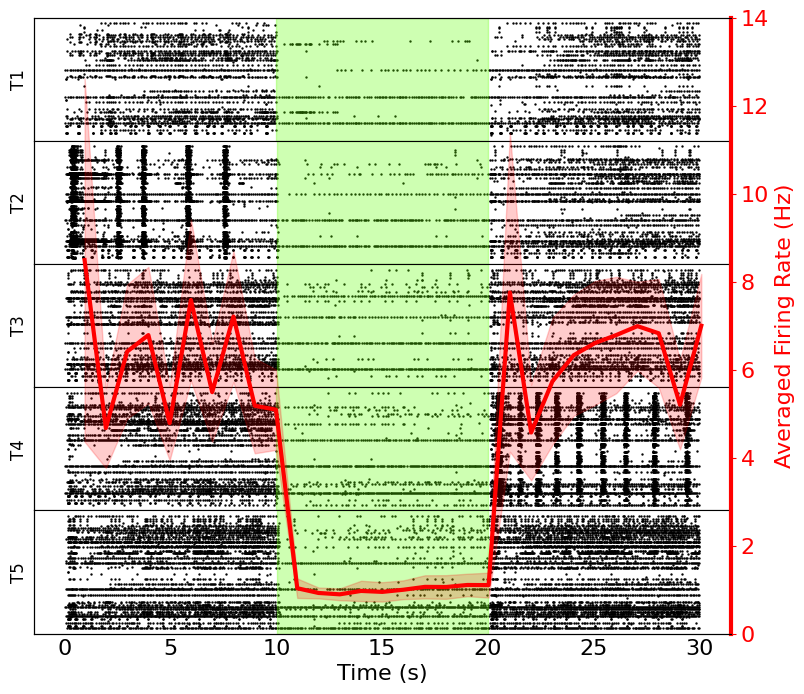

In [42]:
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
fig, axs = plt.subplots(num_trial, 1, figsize = (9,8))
axs1 = fig.add_subplot(111, facecolor="None")
axs1.yaxis.set_label_position("right")

for i in range(num_trial):
    st_trial = spike_data_sub[i].train
    for j in range(len(st_trial)):
        yy = [j] * len(st_trial[j])
        axs[i].scatter(np.asarray(st_trial[j])/1000, yy, s=0.5, color='k')

    axs[i].get_xaxis().set_visible(False)
    # axs[i].get_yaxis().set_visible(False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].tick_params(axis='both', which='both', length=0)
    axs[i].set_ylabel("T" + str(i+1), fontsize=12)
    axs[i].axvspan(xx_stim[0], xx_stim[1], color='#5EFF00', alpha=0.3)
axs[-1].get_xaxis().set_visible(True)
axs[-1].set_xlabel("Time (s)", fontsize=16)
axs[-1].xaxis.set_tick_params(labelsize=16)
plt.subplots_adjust(wspace=0, hspace=0)

axs1.plot(xx_bin, mean_rate, color='r', linewidth=3)
axs1.fill_between(xx_bin, mean_rate-sem_rate, mean_rate+sem_rate, color='r', alpha=0.2)
# axs1.plot(xx_bin, mean_rate[1], color='b', linewidth=3, label="Slice 2")
# axs1.fill_between(xx_bin, mean_rate[1]-sem_rate[1], mean_rate[1]+sem_rate[1], color='b', alpha=0.2)
# axs1.legend(loc="upper right", fontsize=12)
# axs1.axvspan(xx_stim[0], xx_stim[1], color='b', alpha=0.3)
axs1.set_ylabel("Averaged Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (s)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.get_xaxis().set_visible(False)
axs1.yaxis.set_major_locator(MaxNLocator(integer=True))
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.tick_params(axis='y', colors='r')
axs1.set_xlim(-1.4, 31.4)
axs1.set_ylim(0, 14)
# plt.savefig("seizure_raster_fr_hc3.28_0404_only.svg", dpi=300)
# plt. savefig("seizure_raster_fr_hc3.28_0404_only.png", dpi=300)

#### Plot of stats

In [43]:
### box plot of firing rate during each section for each trial
fr_trial_section = dict.fromkeys(np.arange(num_trial))   # firing rate
st_trial_section = dict.fromkeys(np.arange(num_trial))
for i in range(num_trial):
    st_trial = spike_data_sub[i].train
    pre_st, stim_st, post_st = [], [], []
    pre_fr, stim_fr, post_fr = [], [], []
    for st in st_trial:
        st = st / 1000
        [pre_idx, post_idx] = np.searchsorted(st, [10, 20])
        pre_fr.append(len(st[:pre_idx])/10)
        stim_fr.append(len(st[pre_idx: post_idx])/10)
        post_fr.append(len(st[post_idx:])/10)
        pre_st.append(st[:pre_idx])
        stim_st.append(st[pre_idx: post_idx]-10)
        post_st.append(st[post_idx:]-20)
    st_trial_section[i] = {"pre": pre_st, "stim": stim_st, "post": post_st}   
    fr_trial_section[i] = {"pre": pre_fr, "stim": stim_fr, "post": post_fr}   

In [61]:
### save fr_trial_section to a csv for T-test on Pre-stim, stim-post, pre-post
import csv
import pandas as pd
# csv_columns = ["pre", "stim", "post"]
for i in range(num_trial):
    df = pd.DataFrame.from_dict(fr_trial_section[i])
    df = df.rename(columns={'pre': 'pre', 'stim': 'light-on', 'post': 'light-off'})
    csv_file = "hc328_0404_fr_trial_"+str(i+1)+".csv"
    df.to_csv(csv_file, index=False)


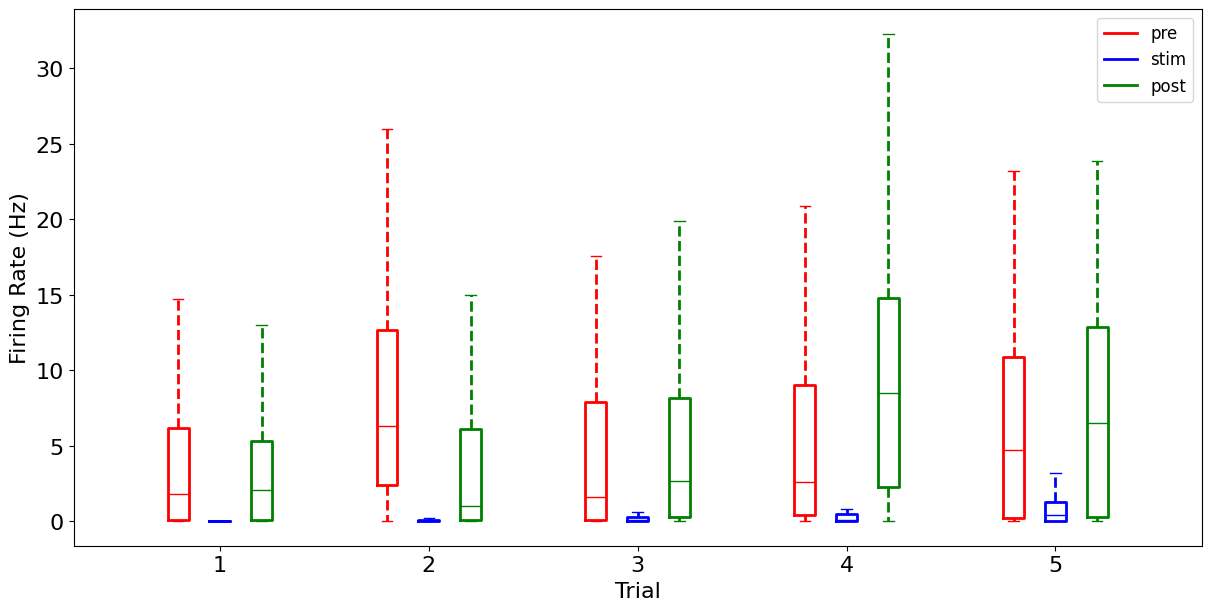

In [53]:
fig, axs = plt.subplots(figsize = (12, 6), constrained_layout=True)
reversed_trial = {"pre":[], "stim": [], "post": []}
reversed_keys = ["pre", "stim", "post"]
edge_colors = ["red", "blue", "g"]
fill_colors = ["tan", "cyan", "green"]
for i in range(num_trial):
    curr = fr_trial_section[i]
    reversed_trial["pre"].append(curr["pre"])
    reversed_trial["stim"].append(curr["stim"])
    reversed_trial["post"].append(curr["post"])

bp = []
for j in range(len(reversed_keys)):
    k = reversed_keys[j]
    # print(j, k, reversed_trial[k])
    bpl = axs.boxplot(reversed_trial[k], positions=np.arange(num_trial)+0.2*j, sym="", widths=0.1, 
                      whiskerprops=dict(linestyle='--',linewidth=2),
                      boxprops= dict(linewidth=2.0))
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bpl[element], color=edge_colors[j])
    bp.append(bpl)

axs.legend([bpl["boxes"][0] for bpl in bp], reversed_keys, fontsize=12) 
plt.xticks(np.arange(0, num_trial)+0.2, np.arange(num_trial)+1)
axs.set_xlabel("Trial", fontsize=16)
axs.set_ylabel("Firing Rate (Hz)", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)

In [54]:
reversed_trial = {"pre":[], "stim": [], "post": []}
reversed_keys = ["pre", "stim", "post"]
edge_colors = ["red", "blue", "g"]
fill_colors = ["tan", "cyan", "green"]
for i in range(num_trial):
    curr = fr_trial_section[i]
    reversed_trial["pre"] += curr["pre"]
    reversed_trial["stim"] += curr["stim"]
    reversed_trial["post"] += curr["post"]

0 325
1 325
2 325


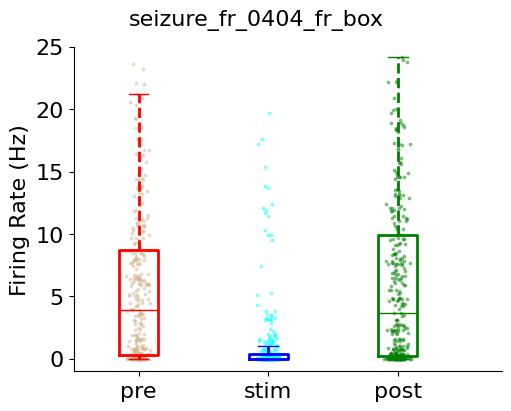

In [59]:
file_name = "seizure_fr_0404"
fig, axs = plt.subplots(figsize = (5, 4), constrained_layout=True)
plt.suptitle("{}_fr_box".format(file_name), fontsize=16)
for j in range(len(reversed_keys)):
    k = reversed_keys[j]
    # print(j, k, reversed_trial[k])
    bpl = axs.boxplot(reversed_trial[k], positions=[j], sym="", widths=0.3, 
                      whiskerprops=dict(linestyle='--',linewidth=2),
                      boxprops= dict(linewidth=2.0))
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bpl[element], color=edge_colors[j])
    bp.append(bpl)

data = list(reversed_trial.values())
for i, d in enumerate(data):
   y = d
   print(i, len(y))
   x = np.random.normal(i, 0.04, len(y))
   plt.scatter(x, y, s=3, color=fill_colors[i], alpha=0.4)

# axs.legend([bpl["boxes"][0] for bpl in bp], reversed_keys, loc="upper right", fontsize=12)
axs.set_xticks(np.arange(len(reversed_keys)), reversed_keys)
# axs.set_xlabel("Trial", fontsize=16)
axs.set_ylabel("Firing Rate (Hz)", fontsize=16)
axs.set_xlim(-0.5, 2.8)
axs.set_ylim(-1, 25)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
axs.spines[['right', 'top']].set_visible(False)
# plt.grid(False)
# plt.savefig("box_fr_{}.svg".format(file_name), dpi=300)
# plt.savefig("box_fr_{}.png".format(file_name), transparent=True, dpi=300)

In [16]:
stim_pairs_bi[0]
stim_pairs_bi[:6]

array([20.0151 , 30.01505, 40.02905, 50.029  , 60.0411 , 70.04105])

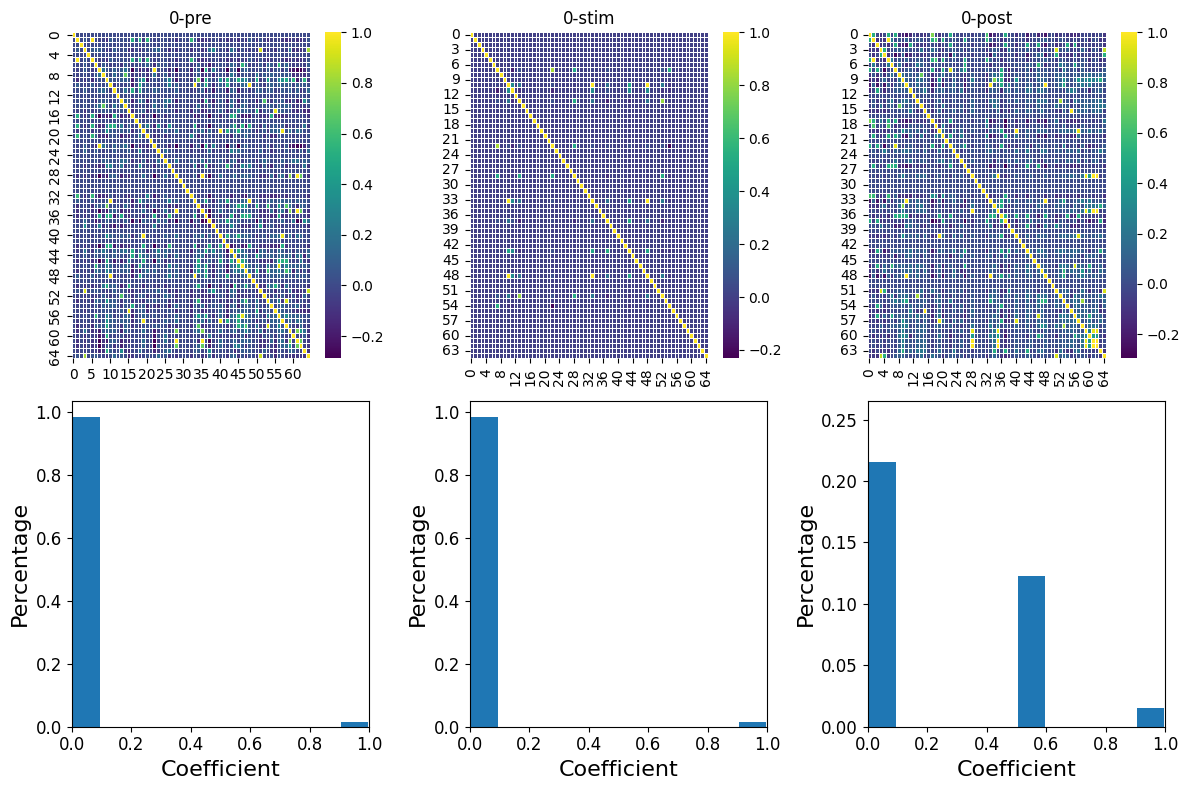

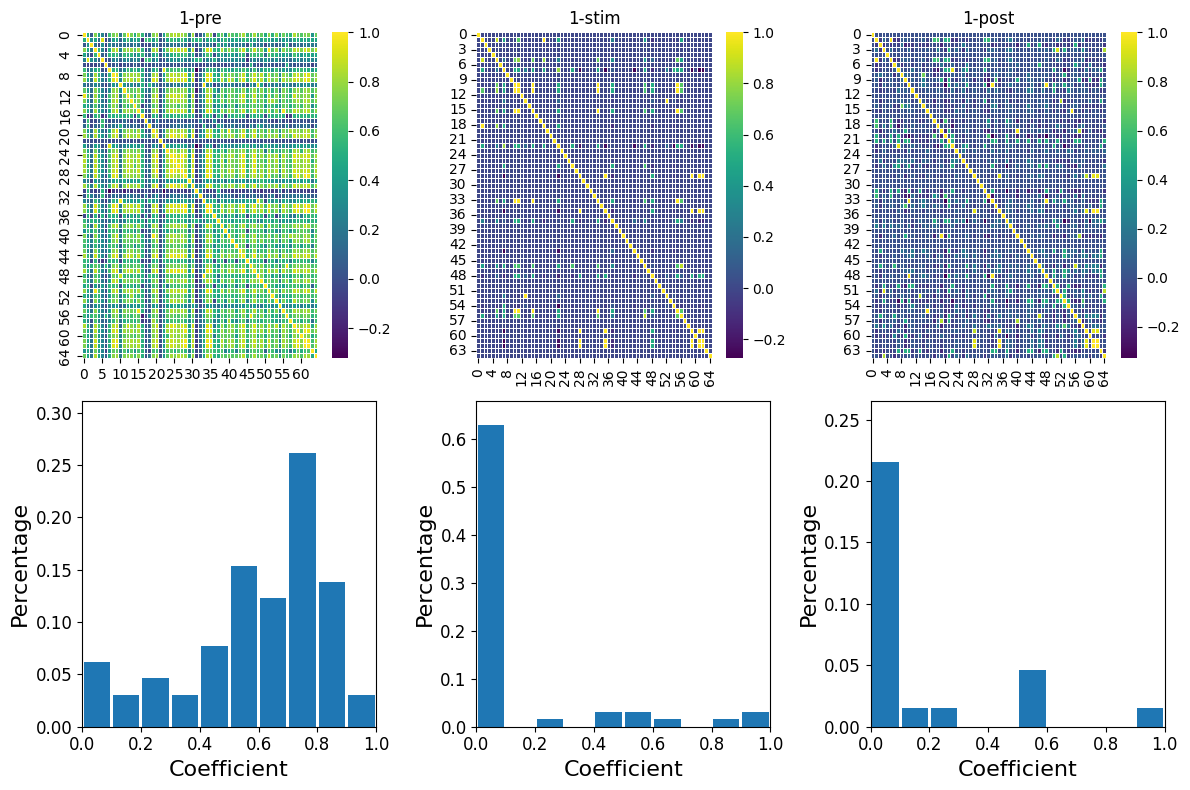

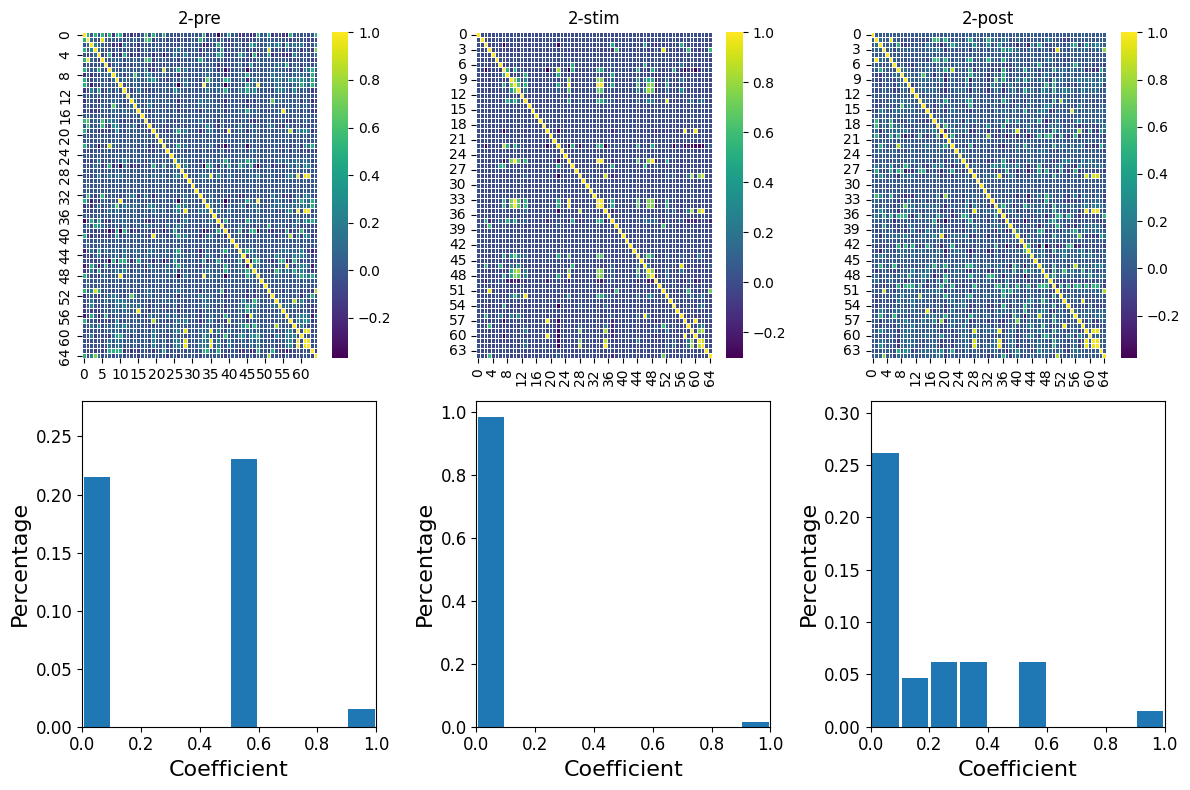

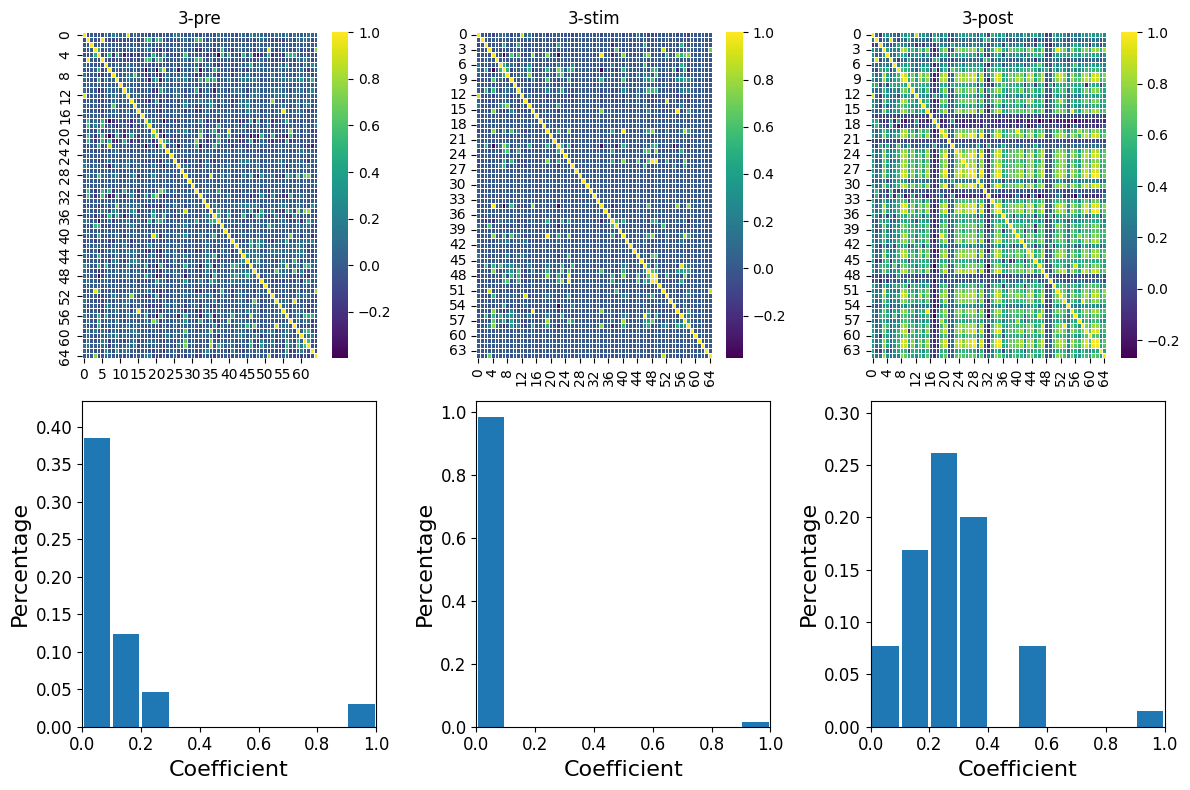

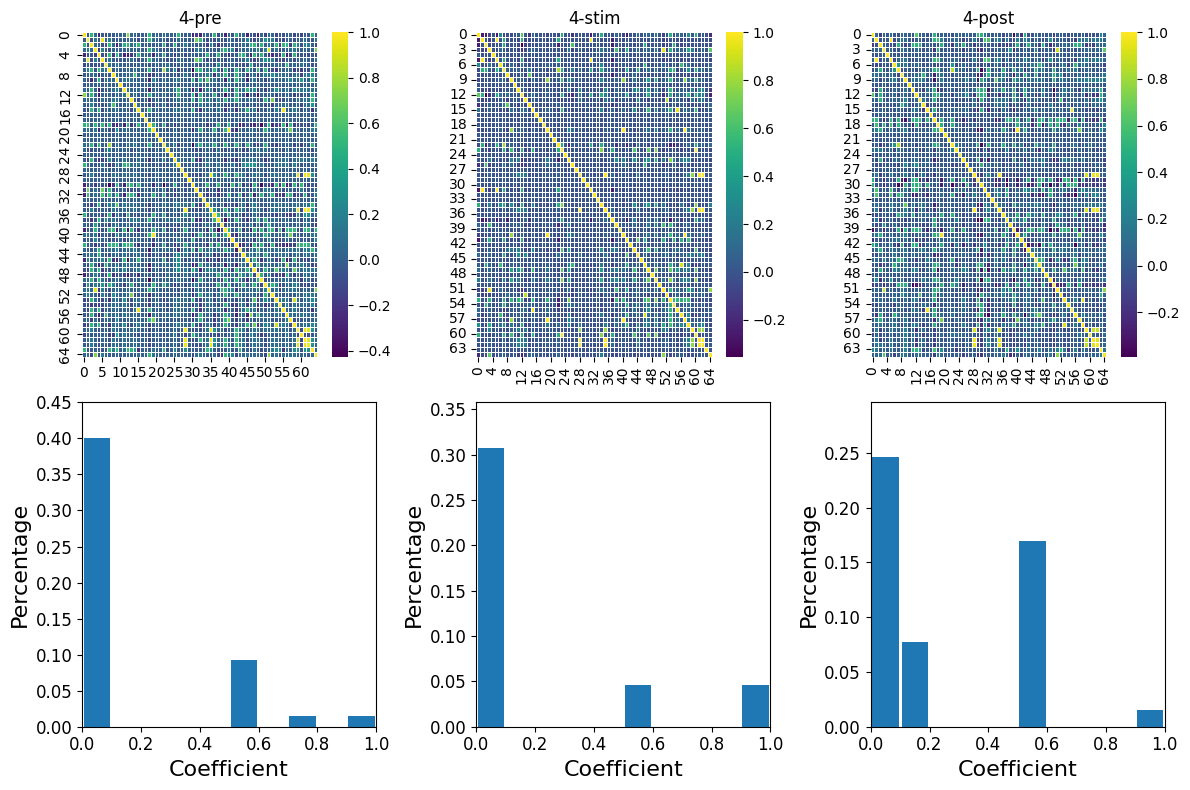

In [17]:
#### sttc heatmap of each trial
import seaborn as sns
for t in range(num_trial):
    fig, ax = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
    sections = ["pre", "stim", "post"]
    for i in range(len(sections)):
        sec = sections[i]
        spikes = analysis.SpikeData(st_trial_section[t][sec])
        sttc = spikes.spike_time_tilings(delt=0.02)
        # print(sttc.shape, np.unique(sttc)

        sns.heatmap(sttc, linewidth=0.5, cmap='viridis', ax=ax[0][i])
        ax[0][i].set_title(str(t) + "-" + sec)

        sttc_flat = sttc[i].ravel()
        n, _, _ = ax[1][i].hist(sttc_flat, bins=np.arange(0, 1.1, 0.1), 
                                weights=np.ones_like(sttc_flat)/len(sttc_flat), rwidth=0.9)
        ax[1][i].set_xlabel("Coefficient", fontsize=16)
        ax[1][i].set_ylabel("Percentage", fontsize=16)
        ax[1][i].xaxis.set_tick_params(labelsize=12)
        ax[1][i].yaxis.set_tick_params(labelsize=12)
        # ax[i].set_title(titles[i], fontsize=16)
        ax[1][i].set_xlim(0, 1)
        ax[1][i].set_ylim(0, max(n)+0.05)

In [18]:
#### sttc heatmap before seizure, during seizure, light-on and light-off
num_sub = 4
sections = [[stim_pairs_bi[0]-20, stim_pairs_bi[0]-10],
            [stim_pairs_bi[0]-10, stim_pairs_bi[0]],
            [stim_pairs_bi[2], stim_pairs_bi[2]+10],
            [stim_pairs_bi[2]+10, stim_pairs_bi[2]+20]]
four_subtime = []
four_sttc = []
for i in range(num_sub):
    sub = spike_data_hckcr_3.subtime(sections[i][0]*1000.0, 
                                               sections[i][1]*1000.0)
    sttc = sub.spike_time_tilings(delt=20)
    four_subtime.append(sub)
    four_sttc.append(sttc)


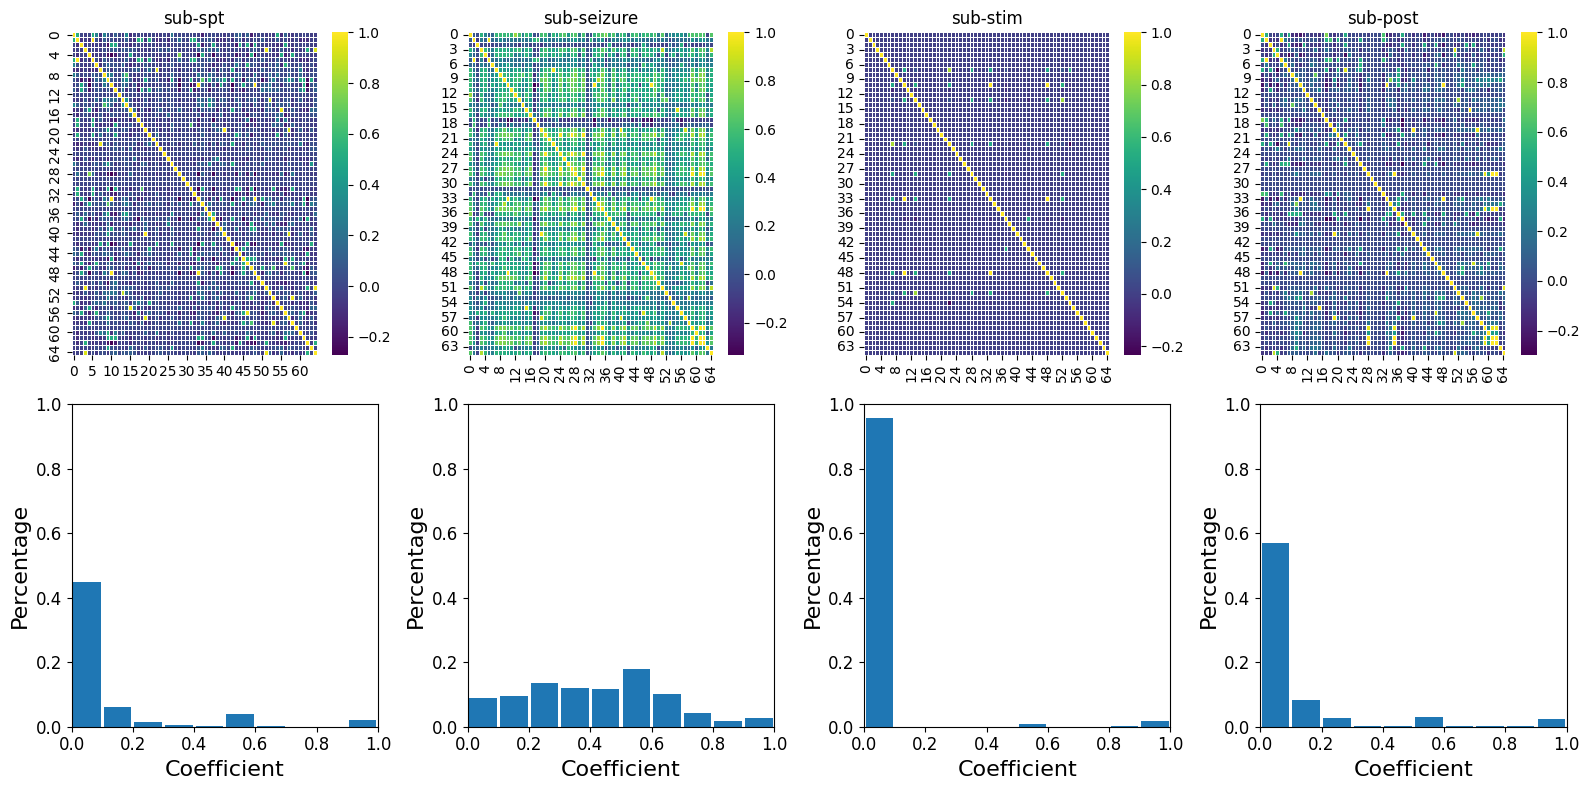

In [19]:
#### sttc heatmap of each subtime
import seaborn as sns
sections = ["spt", "seizure", "stim", "post"]
fig, ax = plt.subplots(2, num_sub, figsize=(16, 8), tight_layout=True)
for i in range(num_sub):
    sns.heatmap(four_sttc[i], linewidth=0.5, cmap='viridis', ax=ax[0][i])
    ax[0][i].set_title("sub-" + sections[i])

    sttc_flat = four_sttc[i].ravel()
    ax[1][i].hist(sttc_flat, bins=np.arange(0, 1.1, 0.1), weights=np.ones_like(sttc_flat)/len(sttc_flat), rwidth=0.9)
    ax[1][i].set_xlabel("Coefficient", fontsize=16)
    ax[1][i].set_ylabel("Percentage", fontsize=16)
    ax[1][i].xaxis.set_tick_params(labelsize=12)
    ax[1][i].yaxis.set_tick_params(labelsize=12)
    # ax[i].set_title(titles[i], fontsize=16)
    ax[1][i].set_xlim(0, 1)
    ax[1][i].set_ylim(0, 1)
    


In [20]:
for sttc in four_sttc:
    print(np.sum(sttc > 0.4))

283
2047
111
261


In [21]:
#### sttc before bicuculine and after bicuculline
baseline_sub  = spike_data_baseline.subtime(0, 20*1000.0)
bicucu_sub = spike_data_hckcr_3.subtime(0, 20*1000.0)
sttc_sub = [spike_data_baseline.spike_time_tilings(),
            bicucu_sub.spike_time_tilings(),
            spike_data_bi0403.spike_time_tilings(),
            baseline_sub.spike_time_tilings()]

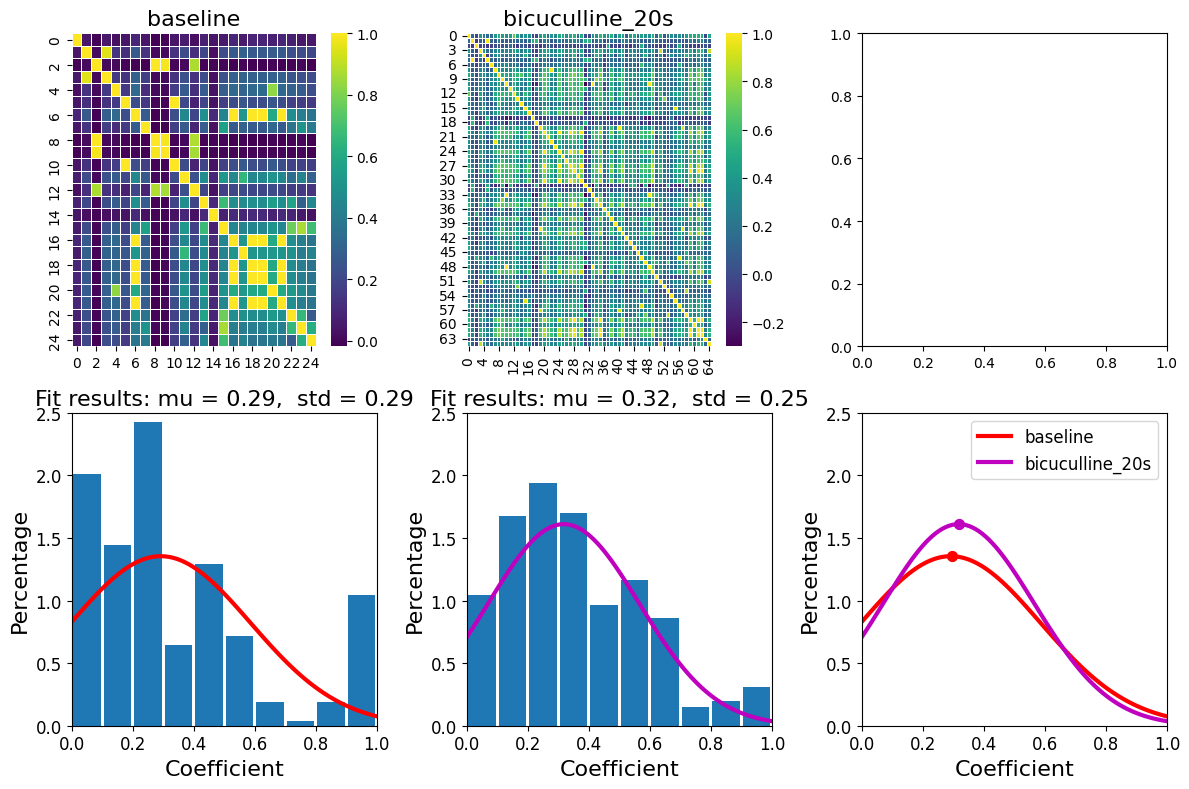

In [68]:
import scipy
titles = ["baseline", "bicuculline_20s", "bicuculline_0403", "baseline_20s" ]
num_fig = 2
colors = ['r', 'm']
labels = ["baseline", "bicuculline_20s"]
fig, ax = plt.subplots(2, num_fig+1, figsize=(4*(num_fig+1), 8), tight_layout=True)
fit_x, fit_p = [], []
for i in range(num_fig):
    sns.heatmap(sttc_sub[i], linewidth=0.5, cmap='viridis', ax=ax[0][i])
    ax[0][i].set_title(titles[i], fontsize=16)

    sttc_flat = sttc_sub[i].ravel()
    ax[1][i].hist(sttc_flat, bins=np.arange(0, 1.1, 0.1), density=True,
                #   weights=np.ones_like(sttc_flat)/len(sttc_flat), 
                  rwidth=0.9)
    mu, std = scipy.stats.norm.fit(sttc_flat)
    xmin, xmax = ax[1][i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    fit_x.append(x)
    fit_p.append(p)
    ax[1][i].plot(x, p, colors[i], linewidth=3)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    ax[1][i].set_title(title, fontsize=16)
    ax[1][i].set_xlabel("Coefficient", fontsize=16)
    ax[1][i].set_ylabel("Percentage", fontsize=16)
    ax[1][i].xaxis.set_tick_params(labelsize=12)
    ax[1][i].yaxis.set_tick_params(labelsize=12)
    ax[1][i].set_xlim(0, 1)
    ax[1][i].set_ylim(0, 2.5)
for i in range(len(fit_x)):
    ax[1][2].plot(fit_x[i], fit_p[i], colors[i], linewidth=3, label=labels[i])
    ax[1][2].scatter(fit_x[i][np.argmax(fit_p[i])], max(fit_p[i]), s=50, color=colors[i])
    ax[1][2].legend(loc="upper right", fontsize=12)
    ax[1][2].xaxis.set_tick_params(labelsize=12)
    ax[1][2].yaxis.set_tick_params(labelsize=12)
    ax[1][2].set_xlabel("Coefficient", fontsize=16)
    ax[1][2].set_ylabel("Percentage", fontsize=16)
    ax[1][2].set_xlim(0, 1)
    ax[1][2].set_ylim(0, 2.5)